# Abalone data exploration

Try to predict number of rings since <strong>measuring the rings on abalones is a long, boring and time consuming process</strong>. 

### Variable description

<table>
    <thead>
        <th>Name</th><th>Data Type</th><th>Meas.</th><th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>Sex</td><td>nominal</td><td>M, F, and I (infant)</td><td></td>
        </tr>
        <tr>
            <td>Length</td><td>continuous	</td><td>mm</td><td>Longest shell measurement</td>
        </tr>
        <tr>
            <td>Diameter</td><td>continuous  </td><td>mm</td><td>perpendicular to length</td>
        </tr>
        <tr>
            <td>Height</td><td>continuous	</td><td>mm	</td><td>with meat in shell</td>
        </tr>
        <tr>
            <td>Whole weight</td><td>continuous	</td><td>grams</td><td>whole abalone</td>
        </tr>
        <tr>
            <td>Shucked weight</td><td>continuous	</td><td>grams</td><td>weight of meat</td>
        </tr>
        <tr>
            <td>Viscera weight</td><td>continuous	</td><td>grams</td><td>gut weight (after bleeding)</td>
        </tr>
        <tr>
            <td>Shell weight</td><td>continuous	</td><td>grams</td><td>after being dried</td>
        </tr>
        <tr>
            <td>Rings</td><td>integer		</td><td>+1.5 </td><td>gives the age in years</td>
        </tr>
    </tbody>
</table>


Downloaded from: https://archive.ics.uci.edu/ml/datasets/Abalone

### Useful libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## First approach 

The dataset is imported and shape, dataset info and the first rows are shown to <b>start knowing the information.</b>

In [2]:
dataset = pd.read_csv("datasets/Abalone/abalone.data",sep=',',names=['Sex','Len','Diam','Height','WholeW','ShuckedW','VisceraW','ShellW','Rings'])
print("(# of rows, # of columns): ",dataset.shape)
print("\n Fields info\n")
dataset.info()
dataset.head()

(# of rows, # of columns):  (4177, 9)

 Fields info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex         4177 non-null object
Len         4177 non-null float64
Diam        4177 non-null float64
Height      4177 non-null float64
WholeW      4177 non-null float64
ShuckedW    4177 non-null float64
VisceraW    4177 non-null float64
ShellW      4177 non-null float64
Rings       4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Sex,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Numerical variable analysis
Then general information is displayed to start to understand the information.

1. Executing the ´Describe´ function, the main measures are executed on numérica values, such as mean, min, max, and others. 

    Here we can see that <b>all the counts are the same and equals to the dataset rows number</b>. This means that all the variables have a value (there are no missing values), which is very important.
    
    Try to identify if there are missing values or <b>strange values</b>, such as `NAN`, `-1`, `?` and others.


In [3]:
dataset.describe()

,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
print("Any NA\n", dataset.isna().any())
print("\nAny null\n", dataset.isnull().any())
print("\nAny strange value\n", dataset.isin([None,-1,0,np.nan]).any())

Any NA
 Sex         False
Len         False
Diam        False
Height      False
WholeW      False
ShuckedW    False
VisceraW    False
ShellW      False
Rings       False
dtype: bool

Any null
 Sex         False
Len         False
Diam        False
Height      False
WholeW      False
ShuckedW    False
VisceraW    False
ShellW      False
Rings       False
dtype: bool

Any strange value
 Sex         False
Len         False
Diam        False
Height       True
WholeW      False
ShuckedW    False
VisceraW    False
ShellW      False
Rings       False
dtype: bool


`Height` apparently has some strange values, try to inspect them. <b>Zero values on Height</b> could be analyzed later, but is useful to have them in mind.



In [5]:
dataset[dataset["Height"].isin([None,-1,0])]

,Sex,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


2. Executing the ´Corr´ function we get a matrix of correlation scores between pairs of fields. 
        
    Although most of our variables are not very correlated with our variable of interest ´Rings´, we can see something interesting, most of them are highly correlated with each other. This could help us if we want to reduce dimensions later.
 
 

In [6]:
dataset.corr()

,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings
Len,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diam,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeW,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedW,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraW,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellW,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Correlation with Rings

If we sort the values by rings and analyze how the variables behave, we can identify that <b>The more the rings the more the value of the other variables</b>, `this means that if all the variables increase the # of rings increase as well`.

We can see then that all of our numerical varaibles have a <b>positive correlation</b> with our interest variable

In [7]:

dataset.sort_values(by="Rings",ascending=True)[dataset.select_dtypes(exclude=["object"]).columns]


,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
520,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
1054,0.195,0.150,0.045,0.0375,0.0180,0.0060,0.0110,3
894,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3
3801,0.205,0.155,0.045,0.0495,0.0235,0.0110,0.0140,3
2371,0.180,0.125,0.050,0.0230,0.0085,0.0055,0.0100,3


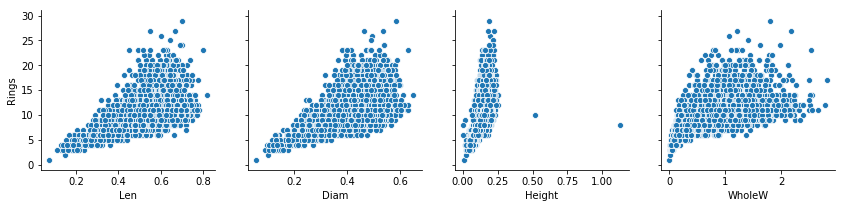

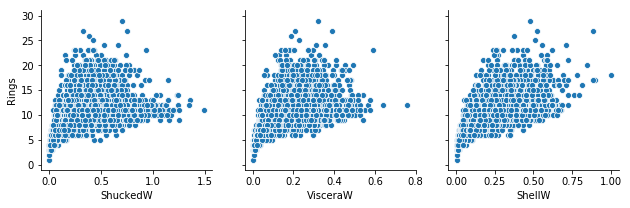

In [8]:
sns.pairplot(dataset,y_vars= ['Rings'],x_vars=['Len','Diam','Height','WholeW'],height=3)
sns.pairplot(dataset,y_vars= ['Rings'],x_vars=['ShuckedW','VisceraW','ShellW'],height=3)


In [9]:
from scipy import stats
dataset['DiamT'], _ = stats.boxcox(dataset['Diam'])
dataset

,Sex,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings,DiamT
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,-0.466921
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,-0.507106
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,-0.440619
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,-0.466921
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,-0.510562
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,-0.494191
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,-0.443130
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,-0.438084
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,-0.464651
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,-0.430339


KeyError: 'LenT'

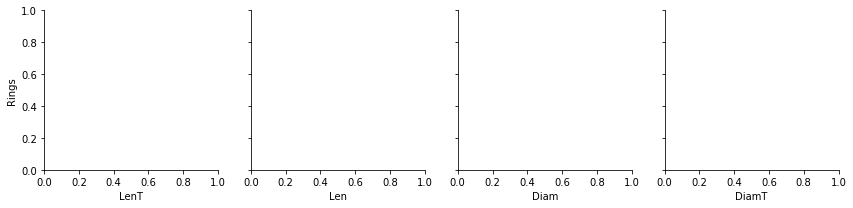

In [10]:
sns.pairplot(dataset,y_vars= ['Rings'],x_vars=['LenT','Len','Diam','DiamT'],height=3)

## Correlation between variables


The variables of our dataset are <b>strongly correlated</b>

In [ ]:
plt.figure(1,(15,10))
plt.subplot(221)
chart= sns.scatterplot(dataset['Len'],dataset['Diam'])
plt.title('Len vs Diam', alpha=0.8)

plt.subplot(222)
chart= sns.scatterplot(dataset['Len'],dataset['Height'])
plt.title('Len vs Height', alpha=0.8)
plt.subplot(223)
chart= sns.scatterplot(dataset['WholeW'],dataset['ShuckedW'])
plt.title('WholeW vs ShuckedW', alpha=0.8)
plt.subplot(224)
chart= sns.scatterplot(dataset['WholeW'],dataset['ShellW'])
plt.title('WholeW vs ShellW', alpha=0.8)



2. Finally, we can explore the shape of our variables, plotting them out on a histogram, in order to visualize how they are distributed, whether they are normally distributed or not, or if there is skewness and how sparsed the data is on each variable.<BR/>
        
    Here we can see that our variable of interest is skewed to the right, as well as ´shuckedW´ and ´shellW´. In the other hand, the ´len´ and ´diam´ are more normally distributed. 
        
   

In [ ]:
chart = dataset.hist(bins=10,figsize=(14,14))

## Categorical variables analysis

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [ ]:
dataset.describe(include=['object'])

1. First, the values of the categorical variables are counted and plotted.
    
       Here we can see that we have 3 different values and all of them have almost the same quantities.
    Try to identify if there is missing values or strange values, such as `Unknown`, `NA`, `?` and others.

In [ ]:
print("Possible values of field 'sex': ", dataset.Sex.unique())
print("\nAny null\n", dataset.isnull().any())
print("\nAny strange value\n", dataset.isin([None,'','?','Unknown',np.nan]).any())

In [ ]:
dataset.Sex.value_counts()


In [ ]:
chart = plt.bar(dataset.Sex.unique(),dataset.Sex.value_counts())

2. We can compare the number of `rings` based on the categorical variable `sex`. 

        Here we can identify that the # of rings of male and female are similar but not in case of infants. 

In [ ]:
ringsOverSex = pd.pivot_table(dataset,index=["Sex"],values=["Rings"])

chart = ringsOverSex.sort_values(by="Rings").plot(kind="bar")
ringsOverSex


In [ ]:
dataset.sort_values(by="Rings",ascending=True)[["Sex","Rings"]]

When show the values sorted by rings we can identify that most of the sex value appears depending on the number of rings.

thus, if we plot the # of rings separated by Sex, we can see that the infants are mainly located in the first part of the dataset (The left part of the chart), males are located all around the chart, but mainly located in the left-center and right, and the females are located in the right-center and right.

In [ ]:
plt.figure(1,(13,8))
plt.hist(dataset[dataset["Sex"] == 'M']["Rings"], bins=10,label='M')
plt.hist(dataset[dataset["Sex"] == 'F']["Rings"], bins=10,label='F',alpha=0.8)
plt.hist(dataset[dataset["Sex"] == 'I']["Rings"], bins=10,label='I',alpha=0.7)
plt.legend()


If we divide the dataset in some ranges and then count the number of each category, we can see that between zero and six rings, the infants are the most numerous, then the male group is the more numerous followed by females, but finally males and females start to behave equally.

In [11]:
lt6 = dataset[dataset['Rings']<=6]
bt6and11 = dataset[(dataset['Rings']>6) & (dataset['Rings']<=11)]
bt10and15 = dataset[(dataset['Rings']>10) & (dataset['Rings']<=15)]
gt11 = dataset[(dataset['Rings']>11)]

In [12]:
pd.pivot_table(lt6,index=["Sex"],values=["Rings"],aggfunc=[np.count_nonzero])

,count_nonzero
,Rings
Sex,
F,20
I,381
M,47


In [13]:
pd.pivot_table(bt6and11,index=["Sex"],values=["Rings"],aggfunc=[np.count_nonzero])

,count_nonzero
,Rings
Sex,
F,852
I,868
M,1049


In [14]:
pd.pivot_table(bt10and15,index=["Sex"],values=["Rings"],aggfunc=[np.count_nonzero])

,count_nonzero
,Rings
Sex,
F,513
I,131
M,542


In [15]:
pd.pivot_table(gt11,index=["Sex"],values=["Rings"],aggfunc=[np.count_nonzero])

,count_nonzero
,Rings
Sex,
F,435
I,93
M,432


## Atypical values

First of all, lets analyze our variable of interest, looking at which values are not really representative. Plotting the number of rings as a boxplot, we can identify that there are several atypical values, both lower and higher outliers. 

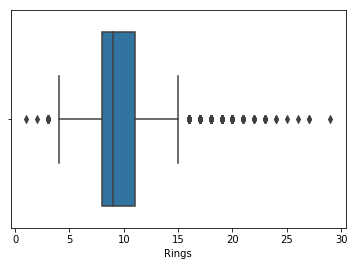

In [16]:
sns.boxplot(dataset['Rings'])

Filtering the information to see how many entries have less than 5 rings, in order to analyze those outliers. we find that just 0.4% of the information (17 rows) has less than 4 rings and most of them are 3, so only 0.047% is bellow 3 rings. 

We need to be careful because most of these outliers belong to the same category `(Sex = 'I')`.
So, computing the percentage of these outliers compared not only with the population but also with the category, we got that only 1.26% of the category is represented by these outliers.
This leads us to avoid this information since it is not really representative 


In [17]:

lowerOutliers = dataset["Rings"] < 4
print("Population len:", len(dataset))
print("Shape of loweOutliers:", dataset[lowerOutliers].shape)
print("Percentage of outlier, related with the population:", sum(lowerOutliers)/len(lowerOutliers)*100,"%")

infants = dataset["Sex"] == "I"

print("Amount of infants:",sum(infants))
print("Percentage of outlier, related with the category I:", sum(lowerOutliers)/sum(infants)*100,"%")
dataset[lowerOutliers]

Population len: 4177
Shape of loweOutliers: (17, 10)
Percentage of outlier, related with the population: 0.4069906631553747 %
Amount of infants: 1342
Percentage of outlier, related with the category I: 1.2667660208643814 %


,Sex,Len,Diam,Height,WholeW,ShuckedW,VisceraW,ShellW,Rings,DiamT
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,-0.555970
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,-0.549996
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,-0.551559
306,I,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3,-0.546489
520,M,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3,-0.540307
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3,-0.548306
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,-0.549996
720,I,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,-0.548306
894,I,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3,-0.534343
1054,I,0.195,0.150,0.045,0.0375,0.0180,0.0060,0.0110,3,-0.540307


Let's do the same analysis with the upper-outliers. but since the upper-outliers are more, representing the 8.71% of the population (364 entries). An analysis was performed by running for each # of rings the analysis and identify which information is not really representative and could affect our results in the future.
So i decided to keep until 16 rings since the information to discard is not more than 4% (136 entries of 4177) and comparing with the sex category is less than 0.7 percent. and after removing both, lower and upper outliers the dataset will be 4.000 and a little more.


In [18]:
generalCounts = dataset["Sex"].value_counts()
print(generalCounts)
dfResults = pd.DataFrame(index= range(15,30),columns=["outliers","general%","F","F%","generalF%","M","M%","generalM%","I","I%","generalI%"])
for i in range(15,30):
    

    upperOutliers = dataset["Rings"] >= i
    counts = dataset[upperOutliers]["Sex"].value_counts()

    dfResults.loc[i,"outliers"] = sum(upperOutliers)
    dfResults.loc[i,"general%"] = sum(upperOutliers)/len(upperOutliers)*100
    dfResults.loc[i,"F"] = counts["F"]
    dfResults.loc[i,"F%"] = counts["F"]/sum(upperOutliers)
    dfResults.loc[i,"generalF%"] = counts["F"]/generalCounts["F"]*100
    dfResults.loc[i,"M"] = counts["M"] if "M" in counts.index else np.nan
    dfResults.loc[i,"M%"] = counts["M"]/sum(upperOutliers)*100 if "M" in counts.index else np.nan
    dfResults.loc[i,"generalM%"] = counts["M"]/generalCounts["M"]*100 if "M" in counts.index else np.nan
    dfResults.loc[i,"I"] = counts["I"] if "I" in counts.index else np.nan
    dfResults.loc[i,"I%"] = counts["I"]/sum(upperOutliers)*100 if "I" in counts.index else np.nan
    dfResults.loc[i,"generalI%"] = counts["I"]/generalCounts["I"]*100 if "I" in counts.index else np.nan
    

dfResults


M    1528
I    1342
F    1307
Name: Sex, dtype: int64


,outliers,general%,F,F%,generalF%,M,M%,generalM%,I,I%,generalI%
15,364,8.71439,163,0.447802,12.4713,167,45.8791,10.9293,34,9.34066,2.53353
16,261,6.2485,122,0.467433,9.33435,115,44.0613,7.52618,24,9.1954,1.78838
17,194,4.64448,92,0.474227,7.03902,85,43.8144,5.56283,17,8.76289,1.26677
18,136,3.25593,66,0.485294,5.04973,60,44.1176,3.9267,10,7.35294,0.745156
19,94,2.25042,47,0.5,3.59602,42,44.6809,2.74869,5,5.31915,0.372578
20,62,1.48432,32,0.516129,2.44836,27,43.5484,1.76702,3,4.83871,0.223547
21,36,0.861863,20,0.555556,1.53022,15,41.6667,0.981675,1,2.77778,0.0745156
22,22,0.526694,13,0.590909,0.994644,9,40.9091,0.589005,NaN,NaN,NaN
23,16,0.38305,10,0.625,0.765111,6,37.5,0.39267,NaN,NaN,NaN
24,7,0.167584,4,0.571429,0.306044,3,42.8571,0.196335,NaN,NaN,NaN


In [19]:
lowerOutliers = dataset["Rings"] < 4
upperOutliers = dataset["Rings"] > 17
mainDs = dataset[~lowerOutliers & ~upperOutliers ]
mainDs.shape

(4024, 10)

Text(0.5, 1.0, 'Before')

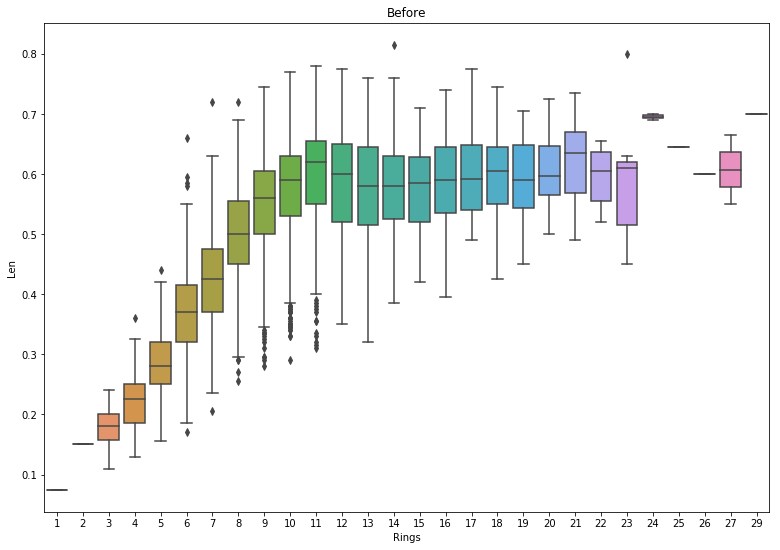

In [20]:
plt.figure(1,(13,9))
boxplotChart = sns.boxplot(data=dataset,x="Rings",y="Len")
plt.title("Before")

Text(0.5, 1.0, 'After')

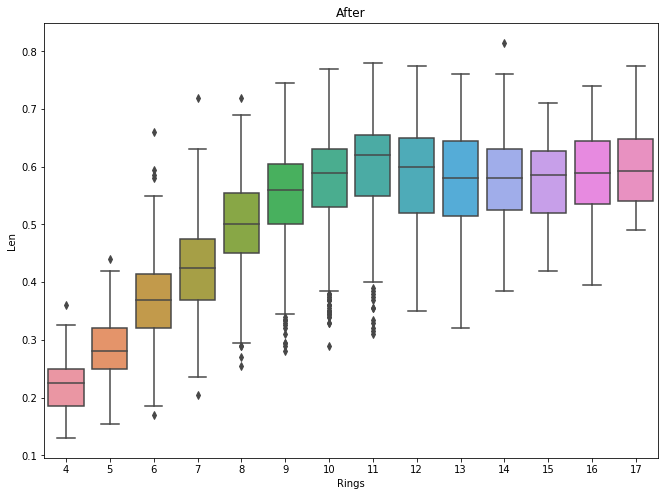

In [21]:
plt.figure(1,(11,8))
boxplotChart = sns.boxplot(data=mainDs,x="Rings",y="Len")
plt.title("After")

A similar analysis can be applied on features, such as `Height` since it seems to have high outliers.

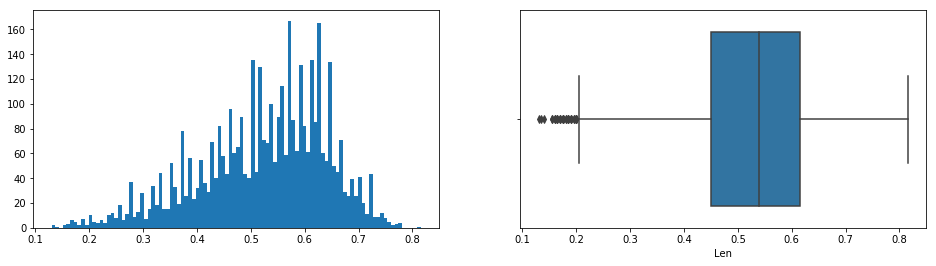

In [23]:
plt.figure(1,figsize=(16,4))
plt.subplot(121)
hist = plt.hist(mainDs['Len'],bins=100)
plt.subplot(122)
sns.boxplot(mainDs['Len'])


We can see that the first two entries are not normal since the values are extremely high; especially the first one because it has a huge heigh but just a few rings, which is not normal. 

Here we can see that there are some entries with the value of 0 height (The last two entries) which is no normal in this kind of measure.

In [ ]:
dataset.sort_values(by="Height",ascending=False)

In [ ]:
lowerOutliers = mainDs["Height"] == 0
upperOutliers = mainDs["Height"] > 0.250


mainDs[lowerOutliers | upperOutliers]

In [ ]:
mainDs2 = mainDs.loc[~lowerOutliers & ~upperOutliers]
print( mainDs.shape)
print( mainDs2.shape)

## Outliers with Z-Score and IQR

These measures are made as a matter of example and to proof the first way, since the first one is too soft and the second one could be too hard. 

### Z-Score

You can get the list of outliers by computing the zcore, `the z-score tells the # of standard deviations from the mean` and then verifying if it is greater than 3 (3 times the standar deviation), which means that the population have 0.1% or even less of probabilities of having those values.

1. Calculate the mean
2. Calculate the standard deviation
3. Calculate the z-score by computing $z=\frac{(X-\mu)}{\sigma}$
4. Define a threshold and compare z-score with it. 
      
   <mark><b>The threshold usually used is 3.</b> Note that this is a guideline and not an absolute rule. Some may say that a z-score beyond $\pm2$ is unusual, while beyond $\pm3$ is highly unusual. Some may use $\pm2.5$ as the cutoff.</mark>
        

In [ ]:
def detect_outlier_Zscore(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers = []
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
outliersList = detect_outlier_Zscore(dataset["Rings"])
print(set(outliersList))
rowsToDelete = dataset[dataset["Rings"].isin(outliersList)].sort_values(by="Rings")
print("Rows to delete:", len(rowsToDelete))
rowsToDelete

In [ ]:
outliersList = detect_outlier_Zscore(dataset["Height"])
print(sorted(set(outliersList)))
rowsToDelete = dataset[dataset["Height"].isin(outliersList)]
print("Rows to delete:", len(rowsToDelete))
rowsToDelete

### IQR

1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range by $ IQR = (q3-q1)$
4. Find lower bound by $ LB = q1*1.5$
5. Find upper bound by $ UB = q3*1.5$
6. Anything that lies outside of lower and upper bound is an outlier

In [ ]:
def detect_outlier_IQR(data):
    sortedDataset = sorted(data)
    sortedDataset
    q1, q3= np.percentile(sortedDataset,[25,75])
    iqr = q3 - q1
    print(iqr)
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return lower_bound, upper_bound

In [ ]:
zlower_bound, zupper_bound = detect_outlier_IQR(dataset["Rings"])
zlower_outliers = dataset["Rings"] < zlower_bound
zupper_outliers = dataset["Rings"] > zupper_bound
print("lower_bound: ", zlower_bound)
print("upper_bound:", zupper_bound)
rowsToDelete = dataset[zlower_outliers | zupper_outliers].sort_values(by="Rings")
print("Rows to delete:", len(rowsToDelete))
rowsToDelete

In [ ]:
lower_bound, upper_bound = detect_outlier_IQR(dataset["Height"])
lower_outliers = dataset["Height"] < lower_bound
upper_outliers = dataset["Height"] > upper_bound
print("lower_bound: ", lower_bound)
print("upper_bound:", upper_bound)
rowstoDelete = dataset[lower_outliers | upper_outliers].sort_values(by="Height")
print("Rows to delete:", len(rowsToDelete))
rowsToDelete

In [ ]:
dataset.groupby("Sex").Rings.value_counts()